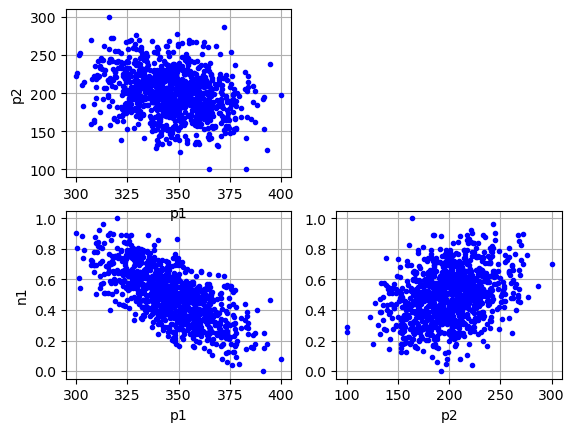

In [50]:
"""Example of generating correlated normally distributed random samples."""

import pandas as pd
import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid

num_samples = 1000

num_items = 200

A = np.array([
        [  6, 0, 0],
        [ -1.25,  6,  0],
        [ -6,  .25,  1.5]
    ])

# Generate samples from three independent normally distributed random variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(3, num_samples))

# We need a matrix `c` for which `c*c^T = r` using the Cholesky decomposition.
# c1 = cholesky(r1, lower=True)
c1 = A

# Convert the data to correlated random variables.
y = np.dot(c1, x)

y[0] = np.interp(y[0] , (y[0].min(), y[0].max()), (300, 400))
y[1] = np.interp(y[1] , (y[1].min(), y[1].max()), (100, 300))
y[2] = np.interp(y[2] , (y[2].min(), y[2].max()), (0, 1))

subplot(2,2,3)
plot(y[0], y[2], 'b.')
xlabel('p1')
ylabel('n1')
# axis('equal')
grid(True)

subplot(2,2,4)
plot(y[1], y[2], 'b.')
xlabel('p2')
# axis('equal')
grid(True)


subplot(2,2,1)
plot(y[0], y[1], 'b.')
xlabel('p1')
ylabel('p2')
# axis('equal')
grid(True)

show()
df = pd.DataFrame(y).T.rename(columns={0: 'p[1]', 1: 'p[2]', 2: 'n[1]'})
df['p[1]'] = round(df['p[1]'],2)
df['p[2]'] = round(df['p[2]'],2)
df['n[1]'] = round(num_items*df['n[1]'])

df.to_csv('price_value_data3.csv',index=False)


In [ ]:
import numpy as np

def cholesky_decomposition(A):
    n = len(A)
    L = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1):
            if i == j:
                L[i, j] = np.sqrt(A[i, i] - np.sum(L[i, :j]**2))
            else:
                L[i, j] = (A[i, j] - np.sum(L[i, :j] * L[j, :j])) / L[j, j]

    return L


In [51]:
# Example usage
A = np.array([
        [30, -6, -20],
        [-6, 30, 9],
        [-20, 9, 30]
    ])

L = cholesky_decomposition(A)
print("Original Matrix A:")
print(A)

print("\nCholesky Decomposition L:")
print(L)

# Verify the decomposition
print("\nVerification: A = LL^T")
print(np.allclose(A, np.dot(L, L.T)))

Original Matrix A:
[[ 30  -6 -20]
 [ -6  30   9]
 [-20   9  30]]

Cholesky Decomposition L:
[[ 5.47722558  0.          0.        ]
 [-1.09544512  5.36656315  0.        ]
 [-3.65148372  0.93169499  3.97474667]]

Verification: A = LL^T
True
